epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5
epoch:  6
epoch:  7
epoch:  8
epoch:  9
epoch:  10
epoch:  11
epoch:  12
epoch:  13
epoch:  14
epoch:  15
epoch:  16
epoch:  17
epoch:  18
epoch:  19
epoch:  20
epoch:  21
epoch:  22
epoch:  23
epoch:  24
epoch:  25
epoch:  26
epoch:  27
epoch:  28
epoch:  29
epoch:  30
epoch:  31
epoch:  32
epoch:  33
epoch:  34
epoch:  35
epoch:  36
epoch:  37
epoch:  38
epoch:  39
epoch:  40
epoch:  41
epoch:  42
epoch:  43
epoch:  44
epoch:  45
epoch:  46
epoch:  47
epoch:  48
epoch:  49
epoch:  50
epoch:  51
epoch:  52
epoch:  53
epoch:  54
epoch:  55
epoch:  56
epoch:  57
epoch:  58
epoch:  59
epoch:  60
epoch:  61
epoch:  62
epoch:  63
epoch:  64
epoch:  65
epoch:  66
epoch:  67
epoch:  68
epoch:  69
epoch:  70
epoch:  71
epoch:  72
epoch:  73
epoch:  74
epoch:  75
epoch:  76
epoch:  77
epoch:  78
epoch:  79
epoch:  80
epoch:  81
epoch:  82
epoch:  83
epoch:  84
epoch:  85
epoch:  86
epoch:  87
epoch:  88
epoch:  89
epoch:  90
epoch:  91
epoch:  

KeyboardInterrupt: 

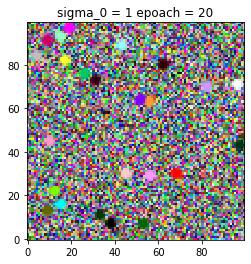

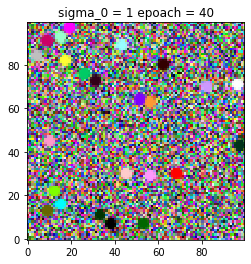

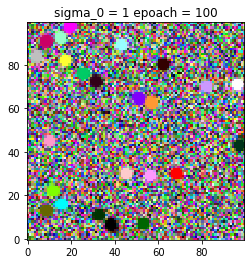

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import copy
from PIL import Image

#get distance in the neuron map
def get_Distance(x1, y1, x2, y2):
    return (np.square((x1 - x2)) + np.square((y1 - y2)))
class Neuron:
    # x, y is the position of that neuron in the neron grid
    # r, g, b are the weights connecting to the input neuron
    def __init__(self, r = 0, g = 0, b = 0, x = 0, y = 0):
        self.r = r

        self.g = g
        self.b = b
        self.x = x
        self.y = y

    def get_R(self):
        return self.r

    def get_G(self):
        return self.g

    def get_B(self):
        return self.b

    def get_X(self):
        return self.x

    def get_Y(self):
        return self.y

    def set_R(self, r):
        self.r = r

    def set_G(self, g):
        self.g = g

    def set_B(self, b):
        self.b = b

    def set_X(self, x):
        self.x = x

    def set_Y(self, y):
        self.y = y

class Som:
    def __init__(self, size, num_Inputs, sigma_0):
        self.size = size
        self.num_Inputs = num_Inputs
        self.iteration = 0
        self.epoch = 0
        self.map = self.neuron_map()
        # T is the total number of training epoch
        self.T = 1000
        self.sigma_0 = sigma_0

    def neuron_map(self):
        #map = np.zeros((self.size, self.size))
        #map = np.full((self.size, self.size), Neuron())
        map = []
        for i in range(self.size):
            list = []
            for j in range(self.size):
                #random generate r, g, b values
                r = random.randint(0, 255) / 255
                g = random.randint(0, 255) / 255
                b = random.randint(0, 255) / 255

                neuron = Neuron(r, g, b, i, j)
                list.append(neuron)
            map.append(list)
        np.array(map)
        return map


    def train(self, r, g, b):
        r = r / 255
        g = g / 255
        b = b / 255

        self.winner_i = 0
        self.winner_j = 0
        #distance = 0
        closest = np.sqrt(1 + 1 + 1)

        # find the winner node in the map
        for i in range(self.size):
            for j in range(self.size):

                r_now = self.map[i][j].get_R()
                g_now = self.map[i][j].get_G()
                b_now = self.map[i][j].get_B()
                distance = np.sqrt((r_now - r) ** 2 + (g_now - g) ** 2 + (b_now - b) ** 2)
                #print(distance)
                if (distance < closest):
                    #print("in")
                    self.winner_i = i
                    self.winner_j = j
                    closest = distance
                    #print(closest)
        #print(closest)
        #update weights
        #print("winner_i: ", self.winner_i)
        #print("winner_j: ", self.winner_j)
        for i in range(self.size):
            for j in range(self.size):
                alpha = 0.8 * np.exp((- self.epoch) / self.T)
                #print(alpha)
                d_i_j = get_Distance(i, j, self.winner_i, self.winner_j)
                #print("d_i_j: ",d_i_j)
                #print(d_i_j)
                sigma_k = self.sigma_0 * np.exp((-self.epoch) / self.T)
                N_i_j = np.exp((- d_i_j) / (2 * (sigma_k ** 2)))
                #print("N_i_j: ",N_i_j)
                #diff_r = self.map[self.winner_i][self.winner_j].get_R() - self.map[i][j].get_R()
                diff_r = r - self.map[i][j].get_R()
                #diff_g = self.map[self.winner_i][self.winner_j].get_G() - self.map[i][j].get_G()
                diff_g = g - self.map[i][j].get_G()
                #diff_b = self.map[self.winner_i][self.winner_j].get_B() - self.map[i][j].get_B()
                diff_b = b - self.map[i][j].get_B()

                self.map[i][j].set_R(self.map[i][j].get_R() + (alpha * N_i_j * diff_r))
                self.map[i][j].set_G(self.map[i][j].get_G() + (alpha * N_i_j * diff_g))
                self.map[i][j].set_B(self.map[i][j].get_B() + (alpha * N_i_j * diff_b))

        self.iteration += 1
        if(self.iteration == self.num_Inputs):
            self. iteration = 0
            self.epoch += 1
            print("epoch: ",self.epoch)

    def reset(self):
        for i in range(self.size):
            for j in range(self.size):
                r = random.randint(0, 255) / 255
                g = random.randint(0, 255) / 255
                b = random.randint(0, 255) / 255
                self.map[i][j].set_R(r)
                self.map[i][j].set_G(g)
                self.map[i][j].set_B(b)

    def display(self, figure_count, sigma_0):
        """
        to_show = np.ones((100, 100))
        for i in range(self.size):
            for j in range(self.size):

                pixel_R = self.map[i][j].get_R() * 255
                print("pixel_R: ", pixel_R)
                pixel_G = self.map[i][j].get_G() * 255
                print("pixel_G: ", pixel_G)
                pixel_B = self.map[i][j].get_B() * 255
                print("pixel_B: ", pixel_B)
                pixel = pixel_R * 65536 + pixel_G * 256 + pixel_B
                to_show[i][j] = pixel

        to_show.astype()
        """
        #image = np.ones((self.size,self.size))
        image = []
        #g = np.ones((self.size,self.size))
        #b = np.ones((self.size,self.size))
        for i in range(self.size):
            res = []
            for j in range(self.size):

                ele = [self.map[i][j].get_R() , self.map[i][j].get_G(), self.map[i][j].get_B()]
                #g[i][j] = self.map[i][j].get_G() * 255
                #b[i][j] = self.map[i][j].get_B() * 255
                res.append(ele)
            image.append(res)
            #print(np.array(res).shape)

        image = np.array(image)
        #print(r)
        #image.astype(np.uint8)
        #print(image)
        #image = np.array([r, g, b])
        plt.figure(figure_count)

        plt.title('sigma_0 = ' + str(sigma_0) + ' epoach = '+ str(self.epoch))
        plt.imshow(image, interpolation='nearest', cmap='bone', origin='lower')
        #plt.colorbar()
        plt.savefig('sigma_0 = ' + str(sigma_0) + ' epoach = '+ str(self.epoch) + '.png')
        #plt.show()

        """
        #image = np.ones((self.size,self.size))
        image = []
        #g = np.ones((self.size,self.size))
        #b = np.ones((self.size,self.size))
        for i in range(self.size):
            res = []
            for j in range(self.size):

                ele = [self.map[i][j].get_R() * 255, self.map[i][j].get_G() * 255, self.map[i][j].get_B() * 255]
                #g[i][j] = self.map[i][j].get_G() * 255
                #b[i][j] = self.map[i][j].get_B() * 255
                res.append(ele)
            image.append(res)
            #print(np.array(res).shape)

        image = np.array(image)
        #print(r)

        #image = np.array([r, g, b])
        #print(image.shape)
        image.astype(np.uint8)
        res = Image.fromarray(image, 'RGB')

        title = 'sigma_0 = ' + str(sigma_0) + ' epoach = '+ str(self.epoch) + ".png"
        res.save(title)
        """









if __name__ == "__main__":

    # create dataset
    # first colunmn is r, second is g, third is b
    input_dataset = np.zeros((24,3))

    #1
    input_dataset[0][0] = 51
    input_dataset[0][1] = 0
    input_dataset[0][2] = 0

    #2
    input_dataset[1][0] = 0
    input_dataset[1][1] = 0
    input_dataset[1][2] = 0

    #3
    input_dataset[2][0] = 255
    input_dataset[2][1] = 255
    input_dataset[2][2] = 255

    #4
    input_dataset[3][0] = 255
    input_dataset[3][1] = 204
    input_dataset[3][2] = 204

    #5
    input_dataset[4][0] = 0
    input_dataset[4][1] = 255
    input_dataset[4][2] = 255

    #6
    input_dataset[5][0] = 153
    input_dataset[5][1] = 255
    input_dataset[5][2] = 255

    #7
    input_dataset[6][0] = 153
    input_dataset[6][1] = 255
    input_dataset[6][2] = 204

    #8
    input_dataset[7][0] = 0
    input_dataset[7][1] = 204
    input_dataset[7][2] = 102

    #9
    input_dataset[8][0] = 255
    input_dataset[8][1] = 0
    input_dataset[8][2] = 255

    #10
    input_dataset[9][0] = 255
    input_dataset[9][1] = 153
    input_dataset[9][2] = 255

    #11
    input_dataset[10][0] = 255
    input_dataset[10][1] = 153
    input_dataset[10][2] = 204

    #12
    input_dataset[11][0] = 192
    input_dataset[11][1] = 192
    input_dataset[11][2] = 192

    #13
    input_dataset[12][0] = 204
    input_dataset[12][1] = 153
    input_dataset[12][2] = 255

    #14
    input_dataset[13][0] = 0
    input_dataset[13][1] = 102
    input_dataset[13][2] = 0

    #15
    input_dataset[14][0] = 204
    input_dataset[14][1] = 0
    input_dataset[14][2] = 102

    #16
    input_dataset[15][0] = 255
    input_dataset[15][1] = 255
    input_dataset[15][2] = 51

    #17
    input_dataset[16][0] = 255
    input_dataset[16][1] = 153
    input_dataset[16][2] = 51

    #18
    input_dataset[17][0] = 128
    input_dataset[17][1] = 255
    input_dataset[17][2] = 0

    #19
    input_dataset[18][0] = 51
    input_dataset[18][1] = 0
    input_dataset[18][2] = 25

    #20
    input_dataset[19][0] = 0
    input_dataset[19][1] = 51
    input_dataset[19][2] = 0

    #21
    input_dataset[20][0] = 102
    input_dataset[20][1] = 102
    input_dataset[20][2] = 0

    #22
    input_dataset[21][0] = 255
    input_dataset[21][1] = 0
    input_dataset[21][2] = 0

    #23
    input_dataset[22][0] = 127
    input_dataset[22][1] = 0
    input_dataset[22][2] = 255

    #24
    input_dataset[23][0] = 0
    input_dataset[23][1] = 51
    input_dataset[23][2] = 25

    sigma_0_list = [1, 10, 30, 50, 70]

    #print(input_dataset[0])
    epoch = 1000
    for sigma_0 in sigma_0_list:
        som = Som(100, 24, sigma_0)
        count = 1
        for i in range(epoch):
            #print("epoach: ",i)
            for sample in input_dataset:
                som. train(sample[0], sample[1], sample[2])
                #print(som.map[0][0].get_R())
                #print(sample[2])
            """
            if (som.epoch == 1):
                som.display(count, sigma_0)
                count += 1
                continue
            """


            if (som.epoch == 20):
                som.display(count, sigma_0)
                count += 1
                continue

            if (som.epoch == 40):
                som.display(count, sigma_0)
                count += 1
                continue

            if (som.epoch == 100):
                som.display(count, sigma_0)
                count += 1
                continue

            if (som.epoch == 1000):
                som.display(count, sigma_0)
                count += 1
                continue

    #plt.show()